# Sobre el notebook

Este cuaderno contiene diversos desafíos relacionados con los aprendizajes de cada clase. Es un cuaderno diseñado con el enunciado de cada desafío y un espacio para desarrollar y ejecutar sus soluciones. Si es necesario agregar más celdas de código para resolver el desafío, siéntase libre de hacerlo.

# Aula 1

### Desafío 1

Realice la lectura de la base de datos de diabetes y divida los datos en variables explicativas y variable objetivo (X e Y).

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('/content/diabetes.csv')

In [3]:
datos

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [4]:
x = datos.drop('diabetes', axis = 1)
y = datos['diabetes']

### Desafío 2

Realice la división en datos de entrenamiento y datos para prueba.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x, x_test, y, y_test = train_test_split(x, y, stratify = y, test_size = 0.05, random_state = 5)
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify = y, random_state = 5)

### Desafío 3

Cree 2 modelos utilizando los algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) y [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) y evalúe la precisión en los datos de entrenamiento y prueba, eligiendo valores para el parámetro `max_depth` para evitar que los modelos se especialicen demasiado en el patrón de los datos de entrenamiento.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

In [9]:
arbol.fit(x_train, y_train)
print(f'Exactitud de entrenamiento: {arbol.score(x_train, y_train)}')
print(f'Exactitud de validación: {arbol.score(x_val, y_val)}')

Exactitud de entrenamiento: 0.7571428571428571
Exactitud de validación: 0.776595744680851


In [10]:
random_forest.fit(x_train, y_train)
print(f'Exactitud de entrenamiento: {random_forest.score(x_train, y_train)}')
print(f'Exactitud de validación: {random_forest.score(x_val, y_val)}')


Exactitud de entrenamiento: 0.7392857142857143
Exactitud de validación: 0.6808510638297872


### Desafío 4

Construya una matriz de confusión para cada uno de los modelos para evaluar el desempeño de las predicciones.

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

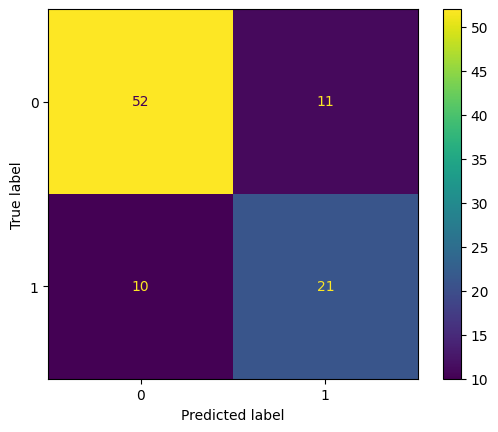

In [12]:
prevision_arbol = arbol.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, prevision_arbol);

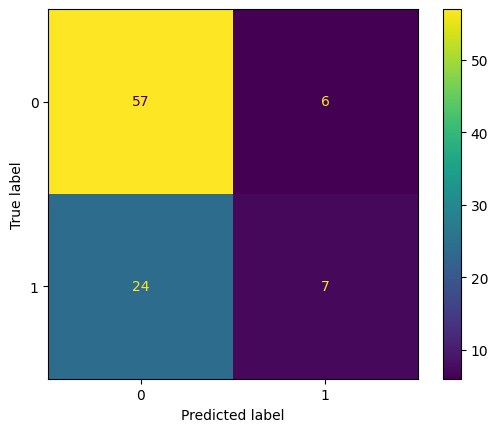

In [13]:
prevision_rf = random_forest.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, prevision_rf);

# Aula 2

### Desafío 1

Extraiga las métricas de precisión, recall, exactitud y F1-Score de los modelos de clasificación generados en el desafío de la lección 1.

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [15]:
prevision_arbol = arbol.predict(x_val)

print(f'Exactitud (Decision Tree): {accuracy_score(y_val, prevision_arbol)}')
print(f'Recall (Decision Tree): {recall_score(y_val, prevision_arbol)}')
print(f'Precisión (Decision Tree): {precision_score(y_val, prevision_arbol)}')
print(f'F1_Score (Decision Tree): {f1_score(y_val, prevision_arbol)}')

Exactitud (Decision Tree): 0.776595744680851
Recall (Decision Tree): 0.6774193548387096
Precisión (Decision Tree): 0.65625
F1_Score (Decision Tree): 0.6666666666666666


In [16]:
prevision_rf = random_forest.predict(x_val)

print(f'Exactitud (Random Forest): {accuracy_score(y_val, prevision_rf)}')
print(f'Recall (Random Forest): {recall_score(y_val, prevision_rf)}')
print(f'Precisión (Random Forest): {precision_score(y_val, prevision_rf)}')
print(f'F1_Score (Random Forest): {f1_score(y_val, prevision_rf)}')

Exactitud (Random Forest): 0.6808510638297872
Recall (Random Forest): 0.22580645161290322
Precisión (Random Forest): 0.5384615384615384
F1_Score (Random Forest): 0.3181818181818182


### Desafío 2

Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la lección 1, comparando las curvas en el mismo gráfico.  

*Como consejo, revisa la documentación de `Scikit-learn` en este [enlace](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) y busca una forma de presentar los resultados de las curvas en el mismo gráfico utilizando Matplotlib.*

In [17]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

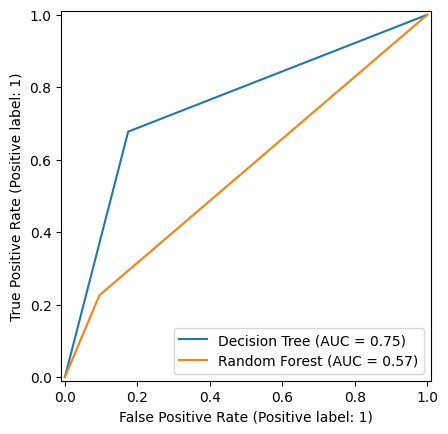

In [18]:
curva_roc = RocCurveDisplay.from_predictions(y_val, prevision_arbol, name = 'Decision Tree')
curva_roc = RocCurveDisplay.from_predictions(y_val, prevision_rf, name = 'Random Forest', ax = curva_roc.ax_)

In [19]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val, prevision_arbol)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val, prevision_rf)}')

AUC (Decision Tree): 0.7514080901177674
AUC (Random Forest): 0.565284178187404


### Desafío 3

Obtén la curva de precisión vs. recall y la métrica AP de los modelos de clasificación generados en el desafío de la lección 1, comparando las curvas en el mismo gráfico.  

*Como sugerencia, revisa la documentación de `Scikit-learn` en este [enlace](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) y busca una forma de presentar los resultados de las curvas en el mismo gráfico utilizando Matplotlib.*

In [20]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

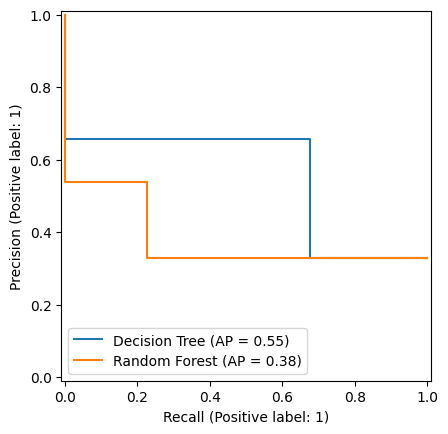

In [21]:
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prevision_arbol, name = 'Decision Tree')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prevision_rf, name = 'Random Forest', ax = curva_precision_recall.ax_)

In [22]:
print(f'AP (Decision Tree): {average_precision_score(y_val, prevision_arbol)}')
print(f'AP (Random Forest): {average_precision_score(y_val, prevision_rf)}')

AP (Decision Tree): 0.5509394303363074
AP (Random Forest): 0.376907238266195


### Desafío 4

Genera los informes de métricas de los modelos de clasificación generados en el desafío de la lección 1.

In [23]:
from sklearn.metrics import classification_report

In [24]:
print('Decision Tree')
print(classification_report(y_val, prevision_arbol))
print('Random Forest')
print(classification_report(y_val, prevision_rf))

Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

Random Forest
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        63
           1       0.54      0.23      0.32        31

    accuracy                           0.68        94
   macro avg       0.62      0.57      0.55        94
weighted avg       0.65      0.68      0.64        94



# Aula 3

### Desafío 1

Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar. La función debe tener un parámetro para recibir una lista con los desempeños de la validación cruzada y otro para presentar el nombre del modelo utilizado en la validación cruzada.  

Ejemplo de retorno de la función:  

> Intervalo de confianza ("nombre del modelo"): ["valor mínimo del intervalo", "valor máximo del intervalo"]


In [25]:
def intervalo_conf(resultados, nombre_modelo):
    media = resultados.mean()
    desvio_tipico = resultados.std()
    print(f'Intervalo de confianza ({nombre_modelo}): [{media - 2*desvio_tipico}, {min(media + 2*desvio_tipico, 1)}]')

### Desafío 2

Evalúe el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes y barajando los datos antes de la separación. Utilice el método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), que no devuelve el tiempo de ejecución, solo las métricas.

In [26]:
from sklearn.model_selection import cross_val_score, KFold

In [27]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, x, y, cv = kf)
resultado_rf = cross_val_score(random_forest, x, y, cv = kf)

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.5337181765177326, 0.8684155361422958]
Intervalo de confianza (Random Forest): [0.6258360105299854, 0.7589435058284784]


### Desafío 3

Evalúe el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (`cross_val_score`) con el método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes y barajando los datos antes de la separación, y evaluando la métrica F1-Score.

In [28]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [29]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, x, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, x, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.271659875902482, 0.7462406274736961]
Intervalo de confianza (Random Forest): [-0.0054857434675021355, 0.6012933551884265]


### Desafío 4

Evalúe el desempeño de los modelos utilizando la validación cruzada (`cross_val_score`) con el método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).  

El método *LeaveOneOut* generará un modelo para cada una de las filas de la base de datos, por lo que la lista de resultados tendrá una tasa de acierto de solo 0 o 1 para cada modelo. Por lo tanto, extraiga únicamente el promedio del resultado, sin utilizar el intervalo de confianza.


In [30]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [31]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arbol = cross_val_score(arbol, x, y, cv = loo)
resultado_rf = cross_val_score(random_forest, x, y, cv = loo)

print(f'Exactitud promedio (Decision Tree): {resultado_arbol.mean()}')
print(f'Exactitud promedio (Random Forest):{resultado_rf.mean()}')

Exactitud promedio (Decision Tree): 0.7085561497326203
Exactitud promedio (Random Forest):0.6898395721925134


# Aula 4

### Desafío 1

Verifique la proporción de datos de la variable objetivo en el conjunto de datos de diabetes. Este análisis puede realizarse a partir del porcentaje de datos o mediante el uso de un gráfico de conteo para comprender si existe un desequilibrio en los datos.

In [32]:
datos['diabetes'].value_counts(normalize = True)

,proportion
diabetes,
0,0.670051
1,0.329949


In [33]:
import seaborn as sns

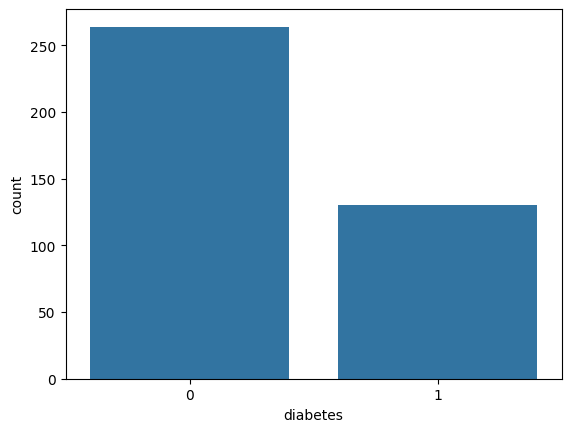

In [34]:
sns.countplot(datos, x = 'diabetes');

### Desafío 2

Utilice un [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) que incluya el ajuste del modelo y el balanceo de los datos mediante oversampling con [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obteniendo el promedio del F1-Score a partir de una validación cruzada con `StratifiedKFold`.

In [35]:
from imblearn.pipeline import Pipeline as imbpipeline

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', arbol)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol.mean()}')

F1 (Decision Tree):0.5417556308685341


In [38]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6082652264103877


### Desafío 3

Utilice un [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) que incluya el ajuste del modelo y el balanceo de los datos mediante undersampling con [`NearMiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) en su versión 3, obteniendo el promedio del F1-Score a partir de una validación cruzada con `StratifiedKFold`.

In [39]:
from imblearn.pipeline import Pipeline as imbpipeline

In [40]:
from imblearn.under_sampling import NearMiss

In [41]:
arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arbol', arbol)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol.mean()}')

F1 (Decision Tree):0.5449681473471796


In [42]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6032500032618712


### Desafío 4

Elige el modelo que obtuvo el mejor desempeño al comparar las estrategias de oversampling y undersampling y realiza la prueba del modelo con los datos de prueba que fueron separados al inicio de los desafíos.

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.50      0.71      0.59         7

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



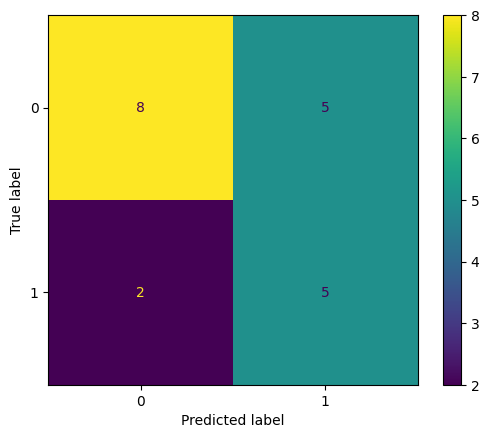

In [43]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);